In [2]:
import pandas as pd
import numpy as np

# Loads the hospitality dataset
df = pd.read_csv('hotel_bookings.csv')

# Checks for missing values
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [3]:
# 1. Handle missing data in key categorical and numerical columns
# Filled missing 'children' with 0 and 'country' with 'Unknown' to maintain data integrity
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')

# 2. Filter out invalid records
# Removed entries where total guests (adults, children, and babies) equal 0 
# This ensures the revenue analysis is based on actual occupied bookings
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

# 3. Standardize data types
# Converted 'children' to integer to ensure consistency for future mathematical operations
df['children'] = df['children'].astype(int)

# 4. Feature Engineering: Revenue & Stay Duration
# Engineered a 'total_stay' column by aggregating weekend and weeknight stays 
# Created a 'revenue' feature by multiplying total nights by the Average Daily Rate (ADR)
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['revenue'] = df['total_stay'] * df['adr']

In [4]:
# I am analyzing the cancellation rate across different hotel types 
# to identify which segments represent the highest revenue risk.
cancellation_summary = df.groupby('hotel')['is_canceled'].mean() * 100

print("Cancellation Rates by Hotel Type:")
print(cancellation_summary)

Cancellation Rates by Hotel Type:
hotel
City Hotel      41.785935
Resort Hotel    27.767373
Name: is_canceled, dtype: float64


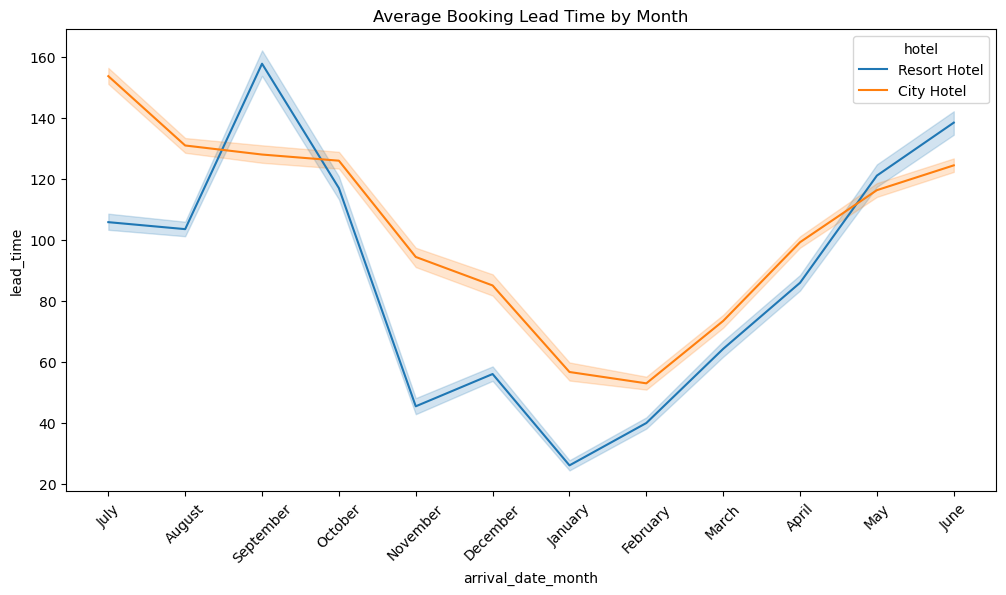

In [5]:
# I am calculating the average lead time per month to help 
# determine the optimal booking window for marketing campaigns.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='lead_time', data=df, hue='hotel')
plt.title('Average Booking Lead Time by Month')
plt.xticks(rotation=45)
plt.show()

In [6]:
# I am aggregating total revenue by market segment to identify 
# the most profitable distribution channels.
segment_revenue = df.groupby('market_segment')['revenue'].sum().sort_values(ascending=False)

print("Total Revenue by Market Segment:")
print(segment_revenue)

Total Revenue by Market Segment:
market_segment
Online TA        23934785.20
Offline TA/TO     8151650.09
Direct            5091252.22
Groups            4669609.70
Corporate          774275.26
Aviation            87446.36
Complementary        5082.52
Undefined              48.00
Name: revenue, dtype: float64


In [7]:
# Save the cleaned hospitality data for SQL analysis
df.to_csv('Hotel_Bookings_Cleaned.csv', index=False)